<a href="https://colab.research.google.com/github/aishwarya-shekar-babu/Road-Accident-Prediction/blob/main/Road_Accident_Prediction_finalmodels_with_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Prediction of Road Accident Severity with Urban factors and Weather conditions

## Research question


1.   **Research Question 1:** which machine learning approach is optimal in accurately predict the severity of UK road accidents using environmental (e.g. weather), temporal (e.g. time of day, season), vehicle data and spatial (e.g. urban/rural), and which features contribute most to severe outcomes?



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LOADING DATASET FROM GITHUB

In [ ]:
#!wget https://github.com/aishwarya-shekar-babu/Road-Accident-Prediction/raw/main/archive.zip -O /content/drive/MyDrive/RoadAccidentData/archive.zip


In [ ]:
#!wget https://github.com/aishwarya-shekar-babu/Road-Accident-Prediction/raw/main/archive-vehicle.zip -O /content/drive/MyDrive/RoadAccidentData/archive-vehicle.zip

In [ ]:
#!unzip /content/drive/MyDrive/RoadAccidentData/archive.zip -d /content/drive/MyDrive/RoadAccidentData/

In [ ]:
#!unzip /content/drive/MyDrive/RoadAccidentData/archive-vehicle.zip -d /content/drive/MyDrive/RoadAccidentData/


# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_curve


# READING DATASET

The dataset contains accident details .Following code is written to merge this dataset and analyse the columns to be considered for further research

In [ ]:
# Path to your file
as_accident_df = pd.read_csv(
    '/content/drive/MyDrive/RoadAccidentData/archive/Accident_Information.csv',
    encoding='ISO-8859-1',
    dtype={'Accident_Index': str},
)

as_vehicle_df = pd.read_csv(
    '/content/drive/MyDrive/RoadAccidentData/archive-vehicle (1)/Vehicle_Information.csv',
    encoding='ISO-8859-1',
    dtype={'Accident_Index': str},
)

print(as_accident_df.columns)
print(as_vehicle_df.columns)

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')
Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_i

In [ ]:
# Perform join to keep only accidents that have at least one vehicle record
as_accident_df = pd.merge(
    as_accident_df,
    as_vehicle_df,
    on='Accident_Index',
    how='inner'
)

print("final shape:", as_accident_df.shape)
display(as_accident_df.head())

final shape: (2058408, 57)


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-11,Tuesday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


In [ ]:
as_accident_df.shape

(2058408, 57)

In [ ]:
as_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058408 entries, 0 to 2058407
Data columns (total 57 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [ ]:
as_accident_df.shape

(2058408, 57)

# Data cleaning and preprocessing

## To check missing counts per column

In [ ]:
#  Missing counts per column and it displays in ascending order
missing_counts = as_accident_df.isna().sum().sort_values(ascending=False)
print("Missing counts per column:")
print(missing_counts)

# 2. Missing values in percentage
missing_pct = (missing_counts / len(as_accident_df) * 100).sort_values(ascending=False)
print("\nMissing percentages per column:")
print(missing_pct)


Missing counts per column:
Carriageway_Hazards                            2022709
Special_Conditions_at_Site                     2006278
Hit_Object_in_Carriageway                      1973945
Hit_Object_off_Carriageway                     1881426
Skidding_and_Overturning                       1798784
2nd_Road_Class                                  827937
Driver_IMD_Decile                               689290
Age_of_Vehicle                                  337962
model                                           299357
Engine_Capacity_.CC.                            250317
Propulsion_Code                                 233598
LSOA_of_Accident_Location                       139207
make                                            110845
2nd_Road_Number                                  18927
Pedestrian_Crossing-Physical_Facilities           1370
Vehicle_Location.Restricted_Lane                  1124
Pedestrian_Crossing-Human_Control                  654
Time                                  

## Dropping unwanted columns and which has more missing values



*   Any column that has more than 40% data missing dropping columns

*   Dropping columns which are not necsaary for further analysis






In [ ]:
# listing the columns to be dropped
cols_to_drop = [
    'Accident_Index',
    '1st_Road_Class',
    '1st_Road_Number',
    '2nd_Road_Class',
    '2nd_Road_Number',
    'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident',
    'Junction_Control',
    'Junction_Detail',
    'Local_Authority_(Highway)',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Special_Conditions_at_Site',
    'Driver_Home_Area_Type',
    'Hit_Object_in_Carriageway',
    'Hit_Object_off_Carriageway',
    'Journey_Purpose_of_Driver',
    'Junction_Location',
    'Propulsion_Code',
    'Skidding_and_Overturning',
    'Towing_and_Articulation',
    'Vehicle_Leaving_Carriageway',
    'Vehicle_Location.Restricted_Lane',
    'Vehicle_Manoeuvre',
    'X1st_Point_of_Impact',
    'Year_x',
    'Year_y'
]

# dropping columns listed above
as_accident_df = as_accident_df.drop(columns=cols_to_drop, errors='ignore')

print("Remaining columns:", as_accident_df.columns.tolist())
print("New shape:", as_accident_df.shape)


Remaining columns: ['Accident_Severity', 'Date', 'Day_of_Week', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'make', 'model', 'Sex_of_Driver', 'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive']
New shape: (2058408, 30)


In [ ]:
print(as_accident_df.columns.tolist())


['Accident_Severity', 'Date', 'Day_of_Week', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'make', 'model', 'Sex_of_Driver', 'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive']


In [ ]:
import pandas as pd

# Define column categories

vehicle_numeric = [
    'Age_of_Vehicle',
    'Driver_IMD_Decile',
    'Engine_Capacity_.CC.',
    'Vehicle_Reference'
]

vehicle_categorical = [
    'Age_Band_of_Driver',
    'make',
    'model',
    'Sex_of_Driver',
    'Vehicle_Type',
    'Was_Vehicle_Left_Hand_Drive'
]

# Define hidden missing tokens
hidden_missing = [
    'Unknown', 'Not known', 'Data missing or out of range',
    'nan', 'N/A', '-', '', 'None', 'null'
]

# Handle numeric columns
for col in vehicle_numeric:
    # Ensure numeric
    as_accident_df[col] = pd.to_numeric(as_accident_df[col], errors='coerce')
    # Fill NaNs with median
    median_val = as_accident_df[col].median()
    as_accident_df[col] = as_accident_df[col].fillna(median_val)

# Handle categorical columns with hidden missing values
for col in vehicle_categorical:
    # Convert to string, strip whitespace, and replace hidden missing with 'Unknown'
    cleaned = (
        as_accident_df[col]
        .astype(str)
        .str.strip()
        .replace(hidden_missing, 'Unknown')
    )
    as_accident_df[col] = cleaned

    # (Optional) Create is_unknown flag column for feature importance analysis
    as_accident_df[f'{col}_is_unknown'] = cleaned == 'Unknown'

# Check for remaining missing values
missing_after = as_accident_df[vehicle_numeric + vehicle_categorical].isna().sum()
print("Missing values after imputation:\n", missing_after)

# Check how many 'Unknown' values exist per categorical column
print("Counts of 'Unknown' values per categorical column:")
for col in vehicle_categorical:
    unknown_count = (as_accident_df[col] == 'Unknown').sum()
    print(f"{col}: {unknown_count}")


Missing values after imputation:
 Age_of_Vehicle                 0
Driver_IMD_Decile              0
Engine_Capacity_.CC.           0
Vehicle_Reference              0
Age_Band_of_Driver             0
make                           0
model                          0
Sex_of_Driver                  0
Vehicle_Type                   0
Was_Vehicle_Left_Hand_Drive    0
dtype: int64
Counts of 'Unknown' values per categorical column:
Age_Band_of_Driver: 162771
make: 110845
model: 299357
Sex_of_Driver: 72938
Vehicle_Type: 400
Was_Vehicle_Left_Hand_Drive: 9146


In [ ]:
print("New shape:", as_accident_df.shape)

New shape: (2058408, 36)


In [ ]:
print("New shape:", as_accident_df.columns)


New shape: Index(['Accident_Severity', 'Date', 'Day_of_Week', 'Latitude',
       'Light_Conditions', 'Local_Authority_(District)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'InScotland', 'Age_Band_of_Driver',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'make',
       'model', 'Sex_of_Driver', 'Vehicle_Reference', 'Vehicle_Type',
       'Was_Vehicle_Left_Hand_Drive', 'Age_Band_of_Driver_is_unknown',
       'make_is_unknown', 'model_is_unknown', 'Sex_of_Driver_is_unknown',
       'Vehicle_Type_is_unknown', 'Was_Vehicle_Left_Hand_Drive_is_unknown'],
      dtype='object')


## Subsetting further to filter the columns

The columns are filtered further be proceeding with the modelling

In [ ]:
# original accident‐level columns
accident_cols = [
    'Accident_Severity','Date','Time','Latitude','Longitude',
    'Local_Authority_(District)','Urban_or_Rural_Area',
    'Road_Surface_Conditions','Road_Type','Speed_limit','Weather_Conditions',
    'Light_Conditions','Number_of_Casualties','Number_of_Vehicles',
    'Police_Force','Day_of_Week','InScotland'
]

# vehicle‐level columns
vehicle_cols = [
    'Age_Band_of_Driver','Age_of_Vehicle','Driver_IMD_Decile',
    'Engine_Capacity_.CC.','Sex_of_Driver',
    'Vehicle_Reference','Vehicle_Type','Was_Vehicle_Left_Hand_Drive'
]

# merged DataFrame to include both sets
as_accident_level = as_accident_df[accident_cols + vehicle_cols].copy()
print("After subsetting (accident + vehicle):", as_accident_level.shape)
print(as_accident_level.columns.tolist())


After subsetting (accident + vehicle): (2058408, 25)
['Accident_Severity', 'Date', 'Time', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'Urban_or_Rural_Area', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Weather_Conditions', 'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Day_of_Week', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'Sex_of_Driver', 'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive']


In [ ]:
# 1. Unique values in Urban_or_Rural_Area
print("Unique values in Urban_or_Rural_Area:")
print(as_accident_level['Urban_or_Rural_Area'].value_counts(dropna=False))

# 2. Unique values in Weather_Conditions
print("\nUnique values in Weather_Conditions:")
print(as_accident_level['Weather_Conditions'].value_counts(dropna=False))

Unique values in Urban_or_Rural_Area:
Urban_or_Rural_Area
Urban          1284466
Rural           773852
Unallocated         90
Name: count, dtype: int64

Unique values in Weather_Conditions:
Weather_Conditions
Fine no high winds              1661250
Raining no high winds            238560
Other                             40903
Unknown                           36908
Raining + high winds              27813
Fine + high winds                 25433
Snowing no high winds             13574
Fog or mist                       11152
Snowing + high winds               2635
Data missing or out of range        180
Name: count, dtype: int64


In [ ]:
as_accident_df.shape

(2058408, 36)

## To find the hidden null values
Null values always need not be **NaN**,usually in categorical columns and data missing could also be representd as Data out of Range or unalloacted string,to identify if there is such ourrances checking the unqiue values

In [ ]:
# 1. Identify all object‐ or category‐dtype columns
cat_cols = as_accident_level.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Loop through and print unique values for each
for col in cat_cols:
    unique_vals = as_accident_level[col].unique()
    print(f"Column: {col}")
    print(f"  ({len(unique_vals)} unique values) → {unique_vals}\n")


Column: Accident_Severity
  (3 unique values) → ['Slight' 'Serious' 'Fatal']

Column: Date
  (4383 unique values) → ['2005-01-05' '2005-01-06' '2005-01-07' ... '2016-07-31' '2016-08-01'
 '2016-01-16']

Column: Time
  (1440 unique values) → ['17:36' '00:15' '10:35' ... '03:31' '03:29' '03:39']

Column: Local_Authority_(District)
  (416 unique values) → ['Kensington and Chelsea' 'Westminster' 'Hammersmith and Fulham'
 'City of London' 'Southwark' 'Hackney' 'Islington' 'Camden' 'Lambeth'
 'Brent' 'Haringey' 'Barnet' 'Richmond upon Thames' 'Ealing'
 'Tower Hamlets' 'Waltham Forest' 'Newham' 'London Airport (Heathrow)'
 'Hillingdon' 'Hounslow' 'Redbridge' 'Barking and Dagenham' 'Havering'
 'Croydon' 'Wandsworth' 'Lewisham' 'Greenwich' 'Bromley' 'Bexley' 'Harrow'
 'Sutton' 'Enfield' 'Kingston upon Thames' 'Merton' 'South Lakeland'
 'Barrow-in-Furness' 'Carlisle' 'Eden' 'Copeland' 'Allerdale' 'Blackpool'
 'Fylde' 'Lancaster' 'Blackburn with Darwen' 'Preston' 'Wyre'
 'West Lancashire' 'Chorley

## Handling missing values and duplicate data


*   Dropping most of missing values rows might lead to data loss
*   Other popular ways to handle missing values is imputing values or replacing with unkown parameter


*   While handling the missing values its necessary to also check if the datatype allocated is right its also part of data cleaning and preprocessing
*   There might be columns which is representing data with same details which would be redudant





In [ ]:
# 2.3 Fill missing Time with "00:00"
as_accident_level['Time'] = as_accident_level['Time'].fillna('00:00')

#  Latitude/Longitude to numeric
as_accident_level['Latitude'] = pd.to_numeric(
    as_accident_level['Latitude'], errors='coerce'
)
as_accident_level['Longitude'] = pd.to_numeric(
    as_accident_level['Longitude'], errors='coerce'
)

# 2) Now drop any row where either is NaN
before = as_accident_level.shape[0]
as_accident_level = as_accident_level.dropna(
    subset=['Latitude','Longitude'], how='any'
)

In [ ]:
# 2.5 Drop OS grid columns entirely
as_accident_level = as_accident_level.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR'], errors='ignore')

# 2.6 Fill missing Speed_limit with -1
as_accident_level['Speed_limit'] = as_accident_level['Speed_limit'].fillna(-1)

# 2.10 Fill missing Number_of_Casualties / Number_of_Vehicles with 0
as_accident_level['Number_of_Casualties'] = \
    as_accident_level['Number_of_Casualties'].fillna(0).astype(int)
as_accident_level['Number_of_Vehicles']   = \
    as_accident_level['Number_of_Vehicles'].fillna(0).astype(int)

In [ ]:
# 2.7 Fill missing InScotland with "Unknown"
as_accident_level['InScotland'] = as_accident_level['InScotland'].fillna('Unknown').astype(str).str.strip()



In [ ]:
# 2.9 Fill all remaining categorical columns with "Unknown" if missing
for col in [
    'Local_Authority_(District)',
    'Urban_or_Rural_Area',
    'Road_Surface_Conditions',
    'Road_Type',
    'Weather_Conditions',
    'Light_Conditions',
    'Day_of_Week',
    'Police_Force'
]:
    as_accident_level[col] = as_accident_level[col].fillna('Unknown').astype(str).str.strip()


# 2.11 PARSE DATE into datetime, letting pandas infer format (no explicit format string):
print("Before date parsing, rows:", as_accident_level.shape[0])
as_accident_level['Date_dt'] = pd.to_datetime(as_accident_level['Date'], errors='coerce')
# Drop any rows where date parse failed—should be very few if any
before_drop_date = as_accident_level.shape[0]
as_accident_level = as_accident_level.dropna(subset=['Date_dt'])
print("Dropped", before_drop_date - as_accident_level.shape[0], "rows where Date parse failed")
print("After date parsing, rows:", as_accident_level.shape[0])


Before date parsing, rows: 2058283
Dropped 0 rows where Date parse failed
After date parsing, rows: 2058283


In [ ]:
# 5.2 SPATIAL: URBAN_OR_RURAL_AREA → Urban_Rural_Label
#     Unique raw values: ['Urban', 'Rural', 'Unallocated']
as_accident_level['Urban_or_Rural_Area'] = as_accident_level['Urban_or_Rural_Area'].astype(str).str.strip()
def map_urban_rural(x):
    if x == 'Urban':
        return 'Urban'
    elif x == 'Rural':
        return 'Rural'
    else:  # 'Unallocated' or anything else
        return 'Unknown'
as_accident_level['Urban_Rural_Label'] = as_accident_level['Urban_or_Rural_Area'].apply(map_urban_rural)

# FEATURE ENGINNERING


## Obtaining temporal features

In [ ]:

# 3.1 TEMPORAL FEATURES
as_accident_level['Hour'] = pd.to_datetime(
    as_accident_level['Date'] + ' ' + as_accident_level['Time'],
    format='%Y-%m-%d %H:%M',  # Time string already "HH:MM", Date "YYYY-MM-DD"
    errors='coerce'
).dt.hour

# If any Hour parse failed (unlikely), fill with median
as_accident_level['Hour'] = as_accident_level['Hour'].fillna(as_accident_level['Hour'].median()).astype(int)

# Weekday and Month from Date_dt
as_accident_level['Month']       = as_accident_level['Date_dt'].dt.month

# 5.8 DAY OF WEEK: Day_of_Week_Label from Date_dt (ignore original Day_of_Week)
as_accident_level['Day_of_Week_Label'] = as_accident_level['Date_dt'].dt.day_name()

# Assuming 'Date_dt' is your datetime column
as_accident_level['Year'] = as_accident_level['Date_dt'].dt.year


# Season from Month
def month_to_season(m):
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
as_accident_level['Season'] = as_accident_level['Month'].apply(month_to_season)

# Time_of_Day from Hour
def time_of_day(h):
    if pd.isna(h):
        return 'Unknown'
    if h < 6:
        return 'Late_Night'
    elif h < 9:
        return 'Morning_Peak'
    elif h < 16:
        return 'Daytime'
    elif h < 19:
        return 'Evening_Peak'
    else:
        return 'Night'
as_accident_level['Time_of_Day'] = as_accident_level['Hour'].apply(time_of_day)


as_accident_level.drop(columns=['Date_dt'], inplace=True)




In [ ]:
as_accident_level.head()

,Accident_Severity,Date,Time,Latitude,Longitude,Local_Authority_(District),Urban_or_Rural_Area,Road_Surface_Conditions,Road_Type,Speed_limit,...,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,Urban_Rural_Label,Hour,Month,Day_of_Week_Label,Year,Season,Time_of_Day
0,Slight,2005-01-05,17:36,51.520075,-0.211708,Kensington and Chelsea,Urban,Dry,Dual carriageway,30.0,...,1,Bus or coach (17 or more pass seats),No,Urban,17,1,Wednesday,2005,Winter,Evening_Peak
1,Slight,2005-01-06,00:15,51.525301,-0.206458,Kensington and Chelsea,Urban,Dry,Single carriageway,30.0,...,1,Bus or coach (17 or more pass seats),No,Urban,0,1,Thursday,2005,Winter,Late_Night
2,Slight,2005-01-07,10:35,51.482442,-0.173862,Kensington and Chelsea,Urban,Dry,Single carriageway,30.0,...,1,Car,No,Urban,10,1,Friday,2005,Winter,Daytime
3,Slight,2005-01-10,21:13,51.495752,-0.156618,Kensington and Chelsea,Urban,Wet or damp,Single carriageway,30.0,...,1,Motorcycle 125cc and under,No,Urban,21,1,Monday,2005,Winter,Night
4,Slight,2005-01-11,12:40,51.515540,-0.203238,Kensington and Chelsea,Urban,Wet or damp,Single carriageway,30.0,...,1,Car,No,Urban,12,1,Tuesday,2005,Winter,Daytime


In [ ]:
as_accident_level.head()

,Accident_Severity,Date,Time,Latitude,Longitude,Local_Authority_(District),Urban_or_Rural_Area,Road_Surface_Conditions,Road_Type,Speed_limit,...,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,Urban_Rural_Label,Hour,Month,Day_of_Week_Label,Year,Season,Time_of_Day
0,Slight,2005-01-05,17:36,51.520075,-0.211708,Kensington and Chelsea,Urban,Dry,Dual carriageway,30.0,...,1,Bus or coach (17 or more pass seats),No,Urban,17,1,Wednesday,2005,Winter,Evening_Peak
1,Slight,2005-01-06,00:15,51.525301,-0.206458,Kensington and Chelsea,Urban,Dry,Single carriageway,30.0,...,1,Bus or coach (17 or more pass seats),No,Urban,0,1,Thursday,2005,Winter,Late_Night
2,Slight,2005-01-07,10:35,51.482442,-0.173862,Kensington and Chelsea,Urban,Dry,Single carriageway,30.0,...,1,Car,No,Urban,10,1,Friday,2005,Winter,Daytime
3,Slight,2005-01-10,21:13,51.495752,-0.156618,Kensington and Chelsea,Urban,Wet or damp,Single carriageway,30.0,...,1,Motorcycle 125cc and under,No,Urban,21,1,Monday,2005,Winter,Night
4,Slight,2005-01-11,12:40,51.515540,-0.203238,Kensington and Chelsea,Urban,Wet or damp,Single carriageway,30.0,...,1,Car,No,Urban,12,1,Tuesday,2005,Winter,Daytime


## Mapping weather types for each string into final label

In [ ]:
#  Define an exact mapping from each weather
weather_map = {
    'Fine no high winds':       'Fine',
    'Fine + high winds':        'Fine+high winds',
    'Raining no high winds':    'Raining',
    'Raining + high winds':     'Raining',
    'Snowing no high winds':    'Snowing_Ice',
    'Snowing + high winds':     'Snowing_Ice',
    'Fog or mist':              'Fog',
    'Other':                    'Other_Adverse',
    'Unknown':                  'Unknown',
    'Data missing or out of range': 'Unknown'
}

#  Ensure there are no trailing
as_accident_level['Weather_Conditions'] = as_accident_level['Weather_Conditions'].astype(str).str.strip()


as_accident_level['Weather_Label'] = (
    as_accident_level['Weather_Conditions']
    .map(weather_map)
    .fillna('Unknown')
)

# Verify that the mapping worked correctly
print("Unique raw Weather_Conditions values:")
print(as_accident_level['Weather_Conditions'].unique(), "\n")

print("Unique mapped Weather_Label values:")
print(as_accident_level['Weather_Label'].unique())

print("\nValue counts for Weather_Label:")
print(as_accident_level['Weather_Label'].value_counts())


Unique raw Weather_Conditions values:
['Fine no high winds' 'Raining no high winds' 'Snowing no high winds'
 'Fine + high winds' 'Other' 'Unknown' 'Raining + high winds'
 'Fog or mist' 'Snowing + high winds' 'Data missing or out of range'] 

Unique mapped Weather_Label values:
['Fine' 'Raining' 'Snowing_Ice' 'Fine+high winds' 'Other_Adverse'
 'Unknown' 'Fog']

Value counts for Weather_Label:
Weather_Label
Fine               1661157
Raining             266355
Other_Adverse        40900
Unknown              37081
Fine+high winds      25433
Snowing_Ice          16206
Fog                  11151
Name: count, dtype: int64


## Mapping surface types for each string into final label

In [ ]:
def map_road_surface(x):
    if x == 'Dry':
        return 'Dry'
    elif x == 'Wet or damp':
        return 'Wet_or_Damp'
    elif x in ['Snow', 'Frost or ice']:
        return 'Snow_Ice'
    elif x == 'Flood over 3cm. deep':
        return 'Flood'
    else:  # 'Data missing or out of range' or anything else
        return 'Unknown'

as_accident_level['Road_Surface_Label'] = as_accident_level['Road_Surface_Conditions'].apply(map_road_surface)

print("Unique Road_Surface_Label values:", as_accident_level['Road_Surface_Label'].unique())



Unique Road_Surface_Label values: ['Dry' 'Wet_or_Damp' 'Snow_Ice' 'Flood' 'Unknown']


In [ ]:
def map_road_type(x):
    if x == 'Dual carriageway':
        return 'Dual_Carriageway'
    elif x == 'Single carriageway':
        return 'Single_Carriageway'
    elif x == 'One way street':
        return 'One_Way_Street'
    elif x == 'Roundabout':
        return 'Roundabout'
    elif x == 'Slip road':
        return 'Slip_Road'
    else:  # 'Unknown' or 'Data missing or out of range'
        return 'Unknown'

as_accident_level['Road_Type_Label'] = as_accident_level['Road_Type'].apply(map_road_type)

print("Unique Road_Type_Label values:", as_accident_level['Road_Type_Label'].unique())


Unique Road_Type_Label values: ['Dual_Carriageway' 'Single_Carriageway' 'One_Way_Street' 'Roundabout'
 'Slip_Road' 'Unknown']


In [ ]:
as_accident_level['Light_Conditions'] = as_accident_level['Light_Conditions'].astype(str).str.strip()

def map_light(x):
    if x == 'Daylight':
        return 'Daylight'
    elif x == 'Darkness - lights lit':
        return 'Darkness_Lights_On'
    elif x == 'Darkness - lights unlit':
        return 'Darkness_Lights_Off'
    elif x in ['Darkness - lighting unknown', 'Darkness - no lighting']:
        return 'Dark_No_Lighting'
    else:  # 'Data missing or out of range' or anything else
        return 'Unknown'

as_accident_level['Light_Label'] = as_accident_level['Light_Conditions'].apply(map_light)

print("Unique Light_Label values:", as_accident_level['Light_Label'].unique())

Unique Light_Label values: ['Darkness_Lights_On' 'Daylight' 'Dark_No_Lighting' 'Darkness_Lights_Off'
 'Unknown']


In [ ]:
def speed_bin(x):
    try:
        sl = float(x)
    except:
        return 'Unknown'
    if sl <= 30:
        return 'Low_30'
    elif sl <= 50:
        return 'Mid_50'
    elif sl <= 70:
        return 'High_70'
    else:
        return 'Very_High'

as_accident_level['Speed_Bin'] = as_accident_level['Speed_limit'].apply(speed_bin)

print("Unique Speed_Bin values:", as_accident_level['Speed_Bin'].unique())

Unique Speed_Bin values: ['Low_30' 'Mid_50' 'High_70']


In [ ]:
# Now that we have mapped/engineered every column, drop the raw ones:
cols_to_drop = [
    'Date',
    'Time',
    'Urban_or_Rural_Area',
    'Road_Surface_Conditions',
    'Road_Type',
    'Speed_limit',
    'Weather_Conditions',
    'Light_Conditions',
    'Day_of_Week'
]

as_accident_level = as_accident_level.drop(columns=[c for c in cols_to_drop if c in as_accident_level.columns],
                                     errors='ignore')

print("\nFinal columns in accident_level:")
print(as_accident_level.columns.tolist())

print("\nFinal shape:", as_accident_level.shape)


Final columns in accident_level:
['Accident_Severity', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'Sex_of_Driver', 'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', 'Urban_Rural_Label', 'Hour', 'Month', 'Day_of_Week_Label', 'Year', 'Season', 'Time_of_Day', 'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label', 'Speed_Bin']

Final shape: (2058283, 28)


In [ ]:
# Assuming your cleaned DataFrame is `as_accident_level`
print(as_accident_level.columns.tolist())


['Accident_Severity', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'Sex_of_Driver', 'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', 'Urban_Rural_Label', 'Hour', 'Month', 'Day_of_Week_Label', 'Year', 'Season', 'Time_of_Day', 'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label', 'Speed_Bin']


# EDA- Target distribution-checking for imbalance

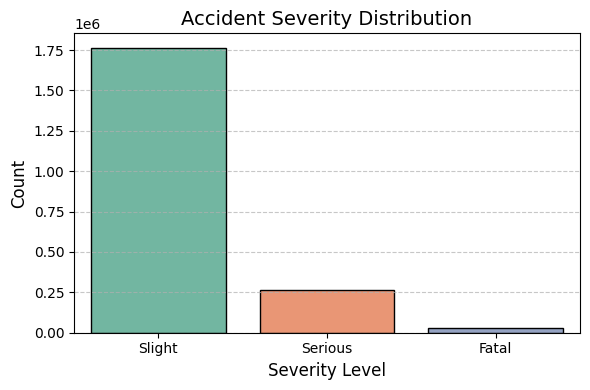

In [ ]:
# Ensure 'Accident_Severity' column exists and has the correct categories
order = ['Slight', 'Serious', 'Fatal']

plt.figure(figsize=(6, 4))
sns.countplot(
    data=as_accident_level,
    x='Accident_Severity',
    hue='Accident_Severity',          # Add this to avoid the future warning
    order=order,
    palette='Set2',                   # Choose a visually appealing palette
    edgecolor='black',
    legend=False                      # Remove redundant legend
)

plt.title('Accident Severity Distribution', fontsize=14)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## EDA PLOTS

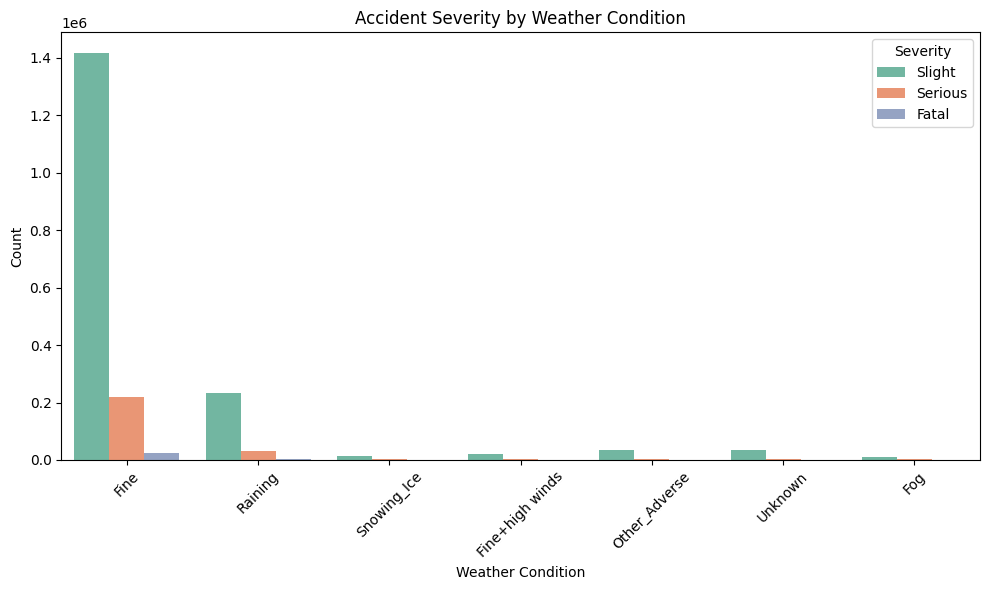

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=as_accident_level, x='Weather_Label', hue='Accident_Severity', palette='Set2')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


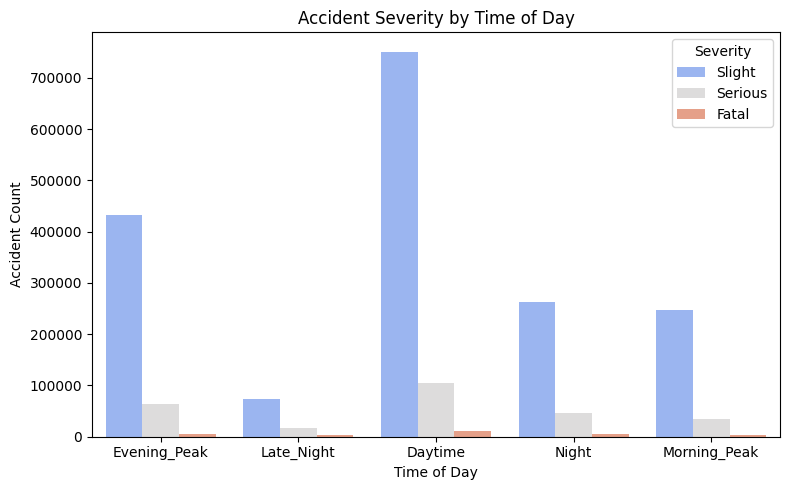

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=as_accident_level, x='Time_of_Day', hue='Accident_Severity', palette='coolwarm')
plt.title('Accident Severity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Accident Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


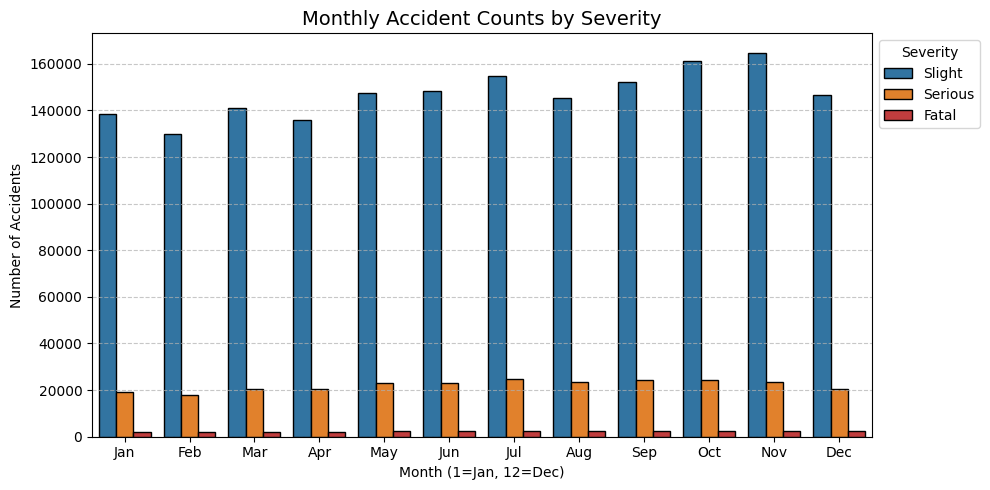

In [ ]:

plt.figure(figsize=(10, 5))

# Use a well-contrasted palette manually
custom_palette = {'Slight': '#1f77b4', 'Serious': '#ff7f0e', 'Fatal': '#d62728'}

sns.countplot(
    data=as_accident_level,
    x='Month',
    hue='Accident_Severity',
    palette=custom_palette,
    edgecolor='black'
)

plt.title('Monthly Accident Counts by Severity', fontsize=14)
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend outside the plot area to the top right
plt.legend(title='Severity', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()



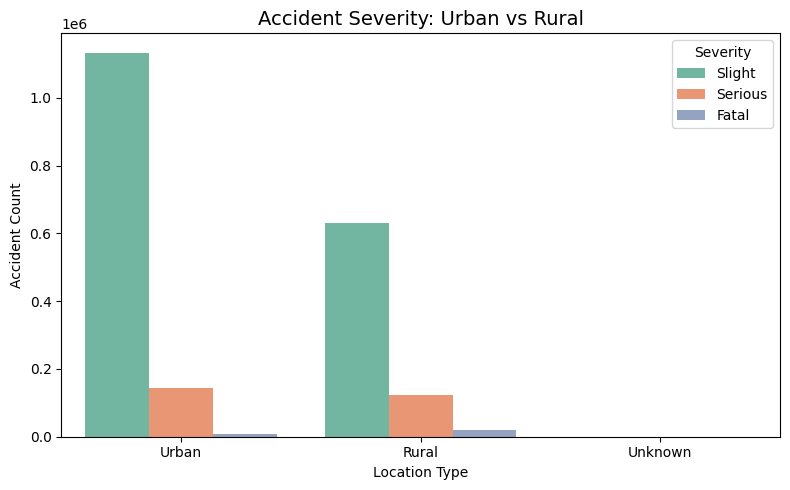

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=as_accident_level,
    x='Urban_Rural_Label',
    hue='Accident_Severity',
    palette='Set2'
)
plt.title('Accident Severity: Urban vs Rural', fontsize=14)
plt.xlabel('Location Type')
plt.ylabel('Accident Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


In [ ]:
# Group by district and accident severity, count occurrences
severity_counts = as_accident_level.groupby(
    ['Local_Authority_(District)', 'Accident_Severity']
).size().unstack(fill_value=0)

# Reorder columns just in case
severity_counts = severity_counts[['Slight', 'Serious', 'Fatal']]

# Total all severities
severity_counts['Total_Accidents'] = severity_counts.sum(axis=1)

# Ensure it's a DataFrame
severity_counts = severity_counts.reset_index()

# Sort descending by total
severity_sorted = severity_counts.sort_values(by='Total_Accidents', ascending=False)

# Show top 10 districts
print(severity_sorted.head(10))




Accident_Severity Local_Authority_(District)  Slight  Serious  Fatal  \
24                                Birmingham   34975     4389    337   
192                                    Leeds   24643     3436    262   
144                             Glasgow City   16633     2037    158   
35                                  Bradford   16301     2148    176   
398                              Westminster   15940     1994     99   
299                                Sheffield   15379     1999    126   
198                                Liverpool   14586     2233     94   
205                               Manchester   14486     1698    141   
126                       Edinburgh, City of   13550     1682     99   
86                                  Cornwall   12209     1982    245   

Accident_Severity  Total_Accidents  
24                           39701  
192                          28341  
144                          18828  
35                           18625  
398                   

In [ ]:

# Get top 10 local authorities by accident count
top_areas = (
    as_accident_level.groupby('Local_Authority_(District)')
    .size()
    .reset_index(name='Accident_Count')
    .sort_values(by='Accident_Count', ascending=False)
    .head(10)
)

# Get average Lat/Lon per district
location_data = (
    as_accident_level.groupby('Local_Authority_(District)')[['Latitude', 'Longitude']]
    .mean()
    .reset_index()
)

# Merge data
top_10_map_data = pd.merge(top_areas, location_data, on='Local_Authority_(District)', how='left')

# Create UK-constrained Folium map
m = folium.Map(
    location=[54.5, -3],      # Center of UK
    zoom_start=6,
    tiles='CartoDB positron',
    max_bounds=True,
    min_zoom=5
)

# Constrain map to approximate UK bounding box
m.fit_bounds([[49.8, -8.6], [60.9, 1.8]])

# Step 5: Add top 10 accident markers
for _, row in top_10_map_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(
            f"<b>{row['Local_Authority_(District)']}</b><br>Accidents: {row['Accident_Count']}",
            max_width=250),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Step 6: Display map in notebook
m


In [ ]:
# Simply get a Python list of column names
final_columns = list(as_accident_level.columns)
print(final_columns)


['Accident_Severity', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'Sex_of_Driver', 'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', 'Urban_Rural_Label', 'Hour', 'Month', 'Day_of_Week_Label', 'Year', 'Season', 'Time_of_Day', 'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label', 'Speed_Bin']


In [ ]:
as_accident_level.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058283 entries, 0 to 2058407
Data columns (total 28 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Accident_Severity            object 
 1   Latitude                     float64
 2   Longitude                    float64
 3   Local_Authority_(District)   object 
 4   Number_of_Casualties         int64  
 5   Number_of_Vehicles           int64  
 6   Police_Force                 object 
 7   InScotland                   object 
 8   Age_Band_of_Driver           object 
 9   Age_of_Vehicle               float64
 10  Driver_IMD_Decile            float64
 11  Engine_Capacity_.CC.         float64
 12  Sex_of_Driver                object 
 13  Vehicle_Reference            int64  
 14  Vehicle_Type                 object 
 15  Was_Vehicle_Left_Hand_Drive  object 
 16  Urban_Rural_Label            object 
 17  Hour                         int64  
 18  Month                        int32  
 19  Day_o

# DATA MODELING

## ENCODING THE FEATURES


*   Not every columns data will be ordinal,in such cases label encoder cant be applied on every column ,hence in this dataset,the ordinal columns are applied with label encoding and rest categorical is included with onehot
* The numerical columns are just used standard normalisation



In [ ]:


# Create the target variable
as_accident_level['Severe&Fatal'] = as_accident_level['Accident_Severity'].isin(['Serious', 'Fatal']).astype(int)

# Label encode ordinal/categorical columns
label_encode_cols = ['Season', 'Time_of_Day', 'Urban_Rural_Label', 'Speed_Bin']
label_encoders = {}

for col in label_encode_cols:
    le = LabelEncoder()
    as_accident_level[col] = le.fit_transform(as_accident_level[col].astype(str))
    label_encoders[col] = le

# One-hot encode non-ordinal categorical features
onehot_encode_cols = [
    'Weather_Label', 'Light_Label', 'Road_Surface_Label',
    'Road_Type_Label', 'Day_of_Week_Label',
    'Age_Band_of_Driver', 'Sex_of_Driver',
    'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive'
]

as_accident_encoded = pd.get_dummies(as_accident_level, columns=onehot_encode_cols, drop_first=True)

# Define feature columns
features = [
    'Number_of_Casualties', 'Number_of_Vehicles', 'Hour', 'Month', 'Year',
    'Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'Vehicle_Reference',
] + label_encode_cols + [col for col in as_accident_encoded.columns if any(prefix + '_' in col for prefix in onehot_encode_cols)]

# Create feature matrix and target
X = as_accident_encoded[features]
y = as_accident_encoded['Severe&Fatal']



In [ ]:
as_accident_level.columns

Index(['Accident_Severity', 'Latitude', 'Longitude',
       'Local_Authority_(District)', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'InScotland',
       'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_IMD_Decile',
       'Engine_Capacity_.CC.', 'Sex_of_Driver', 'Vehicle_Reference',
       'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', 'Urban_Rural_Label',
       'Hour', 'Month', 'Day_of_Week_Label', 'Year', 'Season', 'Time_of_Day',
       'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label',
       'Speed_Bin', 'Severe&Fatal'],
      dtype='object')

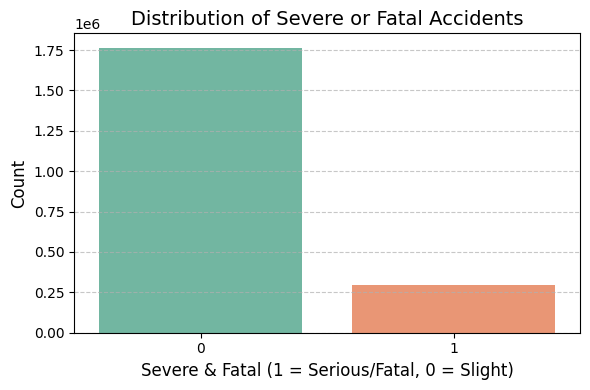

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=as_accident_level,
    x='Severe&Fatal',
    hue='Severe&Fatal',
    palette='Set2'
)

ax.legend_.remove()

plt.title('Distribution of Severe or Fatal Accidents', fontsize=14)
plt.xlabel('Severe & Fatal (1 = Serious/Fatal, 0 = Slight)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# DOWN SAMPLING TO BALANCE DATA

In [ ]:
from sklearn.utils import resample

# Define features and target
X = as_accident_encoded[features]
y = as_accident_encoded['Severe&Fatal']

# Combine into one DataFrame
full_data = pd.concat([X, y], axis=1)

# Split into majority and minority classes
majority = full_data[full_data['Severe&Fatal'] == 0]
minority = full_data[full_data['Severe&Fatal'] == 1]

# Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority) * 2,
    random_state=42
)

# Combine downsampled majority with all minority
balanced_df = pd.concat([majority_downsampled, minority])


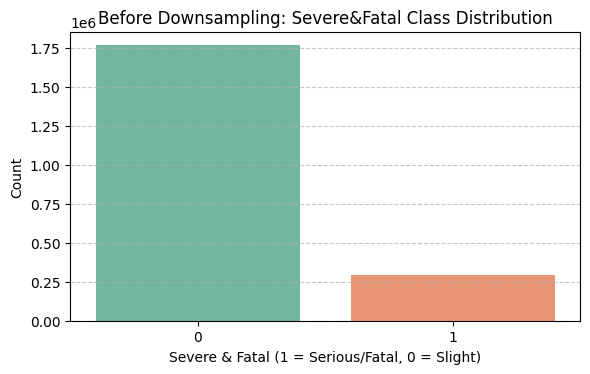

Class counts before downsampling:
Severe&Fatal
0    1765546
1     292737
Name: count, dtype: int64
Severe/Fatal proportion: 14.222%


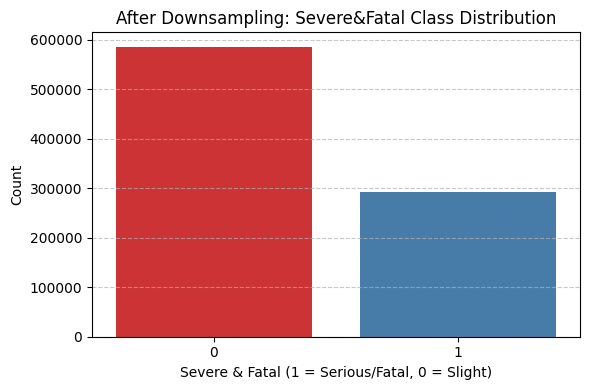


Class counts after downsampling:
Severe&Fatal
0    585474
1    292737
Name: count, dtype: int64
New Severe/Fatal proportion: 33.333%


In [ ]:


# BEFORE DOWNSAMPLING
plt.figure(figsize=(6, 4))
sns.countplot(data=as_accident_level, x='Severe&Fatal', palette='Set2', hue='Severe&Fatal', legend=False)
plt.title('Before Downsampling: Severe&Fatal Class Distribution')
plt.xlabel('Severe & Fatal (1 = Serious/Fatal, 0 = Slight)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Class counts before downsampling:")
print(as_accident_level['Severe&Fatal'].value_counts())
print(f"Severe/Fatal proportion: {as_accident_level['Severe&Fatal'].mean():.3%}")

# AFTER DOWNSAMPLING
balanced_df = pd.concat([majority_downsampled, minority])

plt.figure(figsize=(6, 4))
sns.countplot(data=balanced_df, x='Severe&Fatal', hue='Severe&Fatal', palette='Set1', legend=False)
plt.title('After Downsampling: Severe&Fatal Class Distribution')
plt.xlabel('Severe & Fatal (1 = Serious/Fatal, 0 = Slight)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nClass counts after downsampling:")
print(balanced_df['Severe&Fatal'].value_counts())
print(f"New Severe/Fatal proportion: {balanced_df['Severe&Fatal'].mean():.3%}")


# SPLITTING TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Separate features and target
X = balanced_df.drop(columns=['Severe&Fatal'])
y = balanced_df['Severe&Fatal']

# Step 2: Perform train-test split (only once)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# MODEL 1-LOGISTIC REGRESSION


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.70      0.95      0.80    117095
           1       0.64      0.18      0.28     58548

    accuracy                           0.69    175643
   macro avg       0.67      0.56      0.54    175643
weighted avg       0.68      0.69      0.63    175643

Confusion Matrix:
 [[111236   5859]
 [ 48095  10453]]
ROC AUC Score: 0.6550407753540282


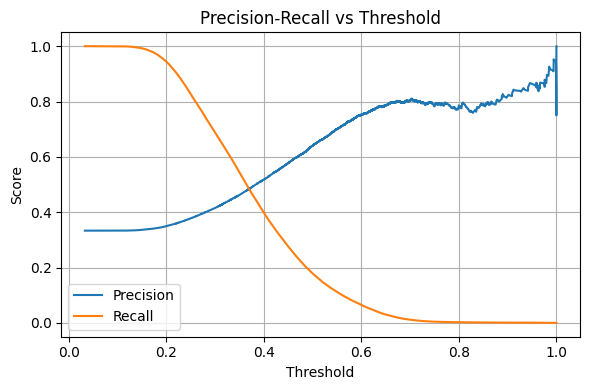

In [ ]:
# === Logistic Regression on Already Downsampled Data ===
# Train Logistic Regression
log_clf = LogisticRegression(max_iter=500, solver='liblinear')
log_clf.fit(X_train, y_train)

# Predictions
y_pred = log_clf.predict(X_test)
y_proba = log_clf.predict_proba(X_test)[:, 1]

# Evaluation
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Precision-Recall Curve + Custom Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Optimized Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.80    117095
           1       0.62      0.23      0.34     58548

    accuracy                           0.70    175643
   macro avg       0.66      0.58      0.57    175643
weighted avg       0.68      0.70      0.65    175643

Confusion Matrix:
 [[108791   8304]
 [ 45021  13527]]
ROC AUC Score: 0.6651891099740468


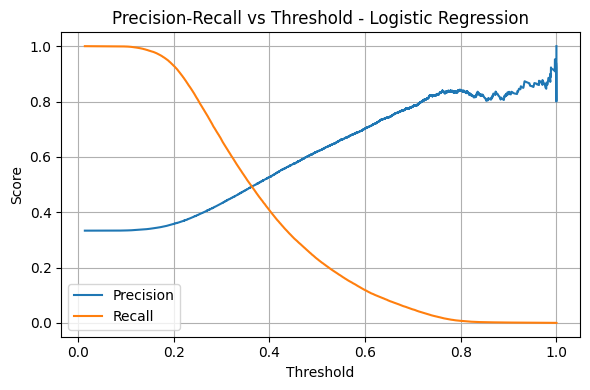

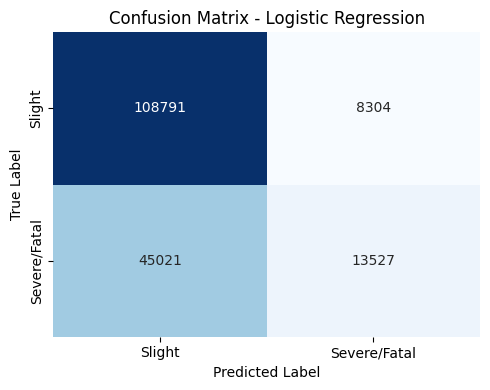

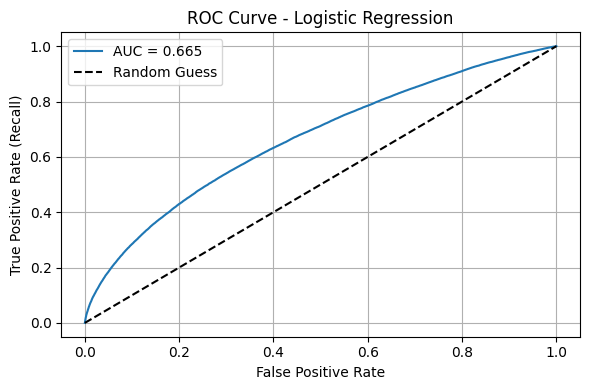

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# 2. Set up Logistic Regression and GridSearch
log_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='f1_macro', verbose=1, n_jobs=-1)

# 3. Fit to training data
grid_search.fit(X_train, y_train)

# 4. Best model
best_log_clf = grid_search.best_estimator_

# 5. Predictions
y_pred_log = best_log_clf.predict(X_test)
y_proba_log = best_log_clf.predict_proba(X_test)[:, 1]

# 6. Evaluation
print("Best Parameters:", grid_search.best_params_)
print("\nOptimized Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_log))

# 7. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_log)
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold - Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_xticklabels(['Slight', 'Severe/Fatal'])
ax.set_yticklabels(['Slight', 'Severe/Fatal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

# 9. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba_log):.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

# Save the trained Logistic Regression model
joblib.dump(best_log_clf, 'logistic_regression_model.pkl')

# Compute evaluation metrics again if needed
cm = confusion_matrix(y_test, y_pred_log)
roc_auc = roc_auc_score(y_test, y_proba_log)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_log)

# Save the evaluation results in a dictionary
results = {
    'model_name': 'Logistic Regression',
    'confusion_matrix': cm,
    'roc_auc': roc_auc,
    'precision': precision,
    'recall': recall,
    'thresholds': thresholds,
    'classification_report': classification_report(y_test, y_pred_log, output_dict=True)
}

# Save the results dictionary to a file
joblib.dump(results, 'logistic_regression_results.pkl')



['logistic_regression_results.pkl']

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4392/4392 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.6619 - loss: 0.6409 - val_accuracy: 0.7004 - val_loss: 0.5811
Epoch 2/50
4392/4392 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6963 - loss: 0.5864 - val_accuracy: 0.7029 - val_loss: 0.5788
Epoch 3/50
4392/4392 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7001 - loss: 0.5816 - val_accuracy: 0.7027 - val_loss: 0.5775
Epoch 4/50
4392/4392 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7009 - loss: 0.5806 - val_accuracy: 0.7040 - val_loss: 0.5766
Epoch 5/50
4392/4392 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7022 - loss: 0.5782 - val_accuracy: 0.7044 - val_loss: 0.5769
Epoch 6/50
4392/4392 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7024 - loss: 0.5791 - val_accuracy: 0.7054 - val_loss: 0.5759
Epoch 7/50
4392/4392 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7046 - loss: 0.5768 - val_accuracy: 0.7046 - val_loss: 0.5765
Epoch 8/50
4392/4392 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7044 - loss: 0

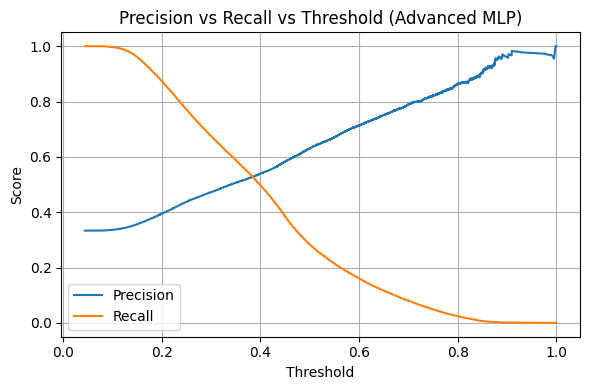

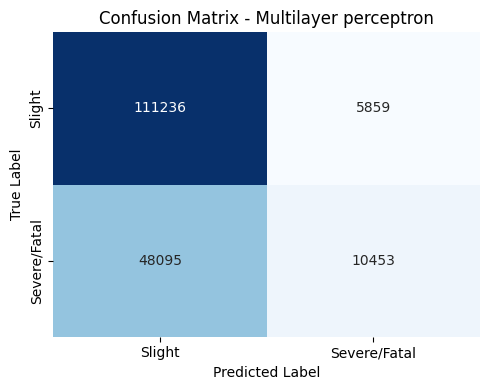

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary output
])

# 3. Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# 4. Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 5. Train the model
history = mlp_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# 6. Predict
mlp_proba = mlp_model.predict(X_test_scaled).flatten()
mlp_pred = (mlp_proba > 0.5).astype(int)

# 7. Evaluate
print(" MLP Classification Report:\n", classification_report(y_test, mlp_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, mlp_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, mlp_proba))

# 8. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, mlp_proba)
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall vs Threshold (Advanced MLP)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)

# Fix tick labels explicitly using set
ax.set_xticklabels(['Slight', 'Severe/Fatal'])
ax.set_yticklabels(['Slight', 'Severe/Fatal'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Multilayer perceptron')
plt.tight_layout()
plt.show()



In [ ]:
import joblib
import numpy as np

# 1. Save the MLP model
mlp_model.save("mlp_model.h5")

# 2. Save the scaler (used for preprocessing)
joblib.dump(scaler, "mlp_scaler.pkl")

# 3. Save evaluation metrics
mlp_results = {
    'model_name': 'MLP',
    'confusion_matrix': cm_mlp,
    'roc_auc': roc_auc_score(y_test, mlp_proba),
    'classification_report': classification_report(y_test, mlp_pred, output_dict=True),
    'precision': precision,
    'recall': recall,
    'thresholds': thresholds
}
joblib.dump(mlp_results, "mlp_results.pkl")


['mlp_results.pkl']


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80    117095
           1       0.61      0.31      0.41     58548

    accuracy                           0.70    175643
   macro avg       0.67      0.61      0.61    175643
weighted avg       0.69      0.70      0.67    175643

Confusion Matrix:
 [[105350  11745]
 [ 40225  18323]]
ROC AUC Score: 0.6994950850273736


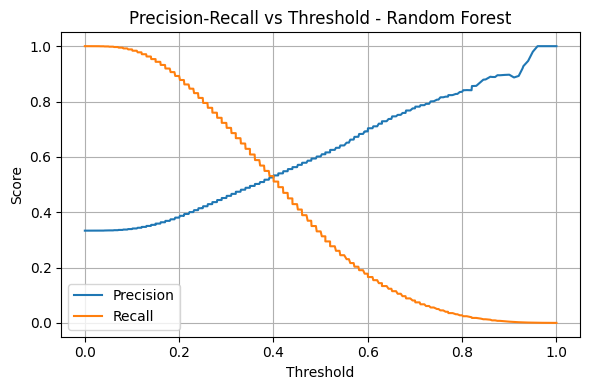

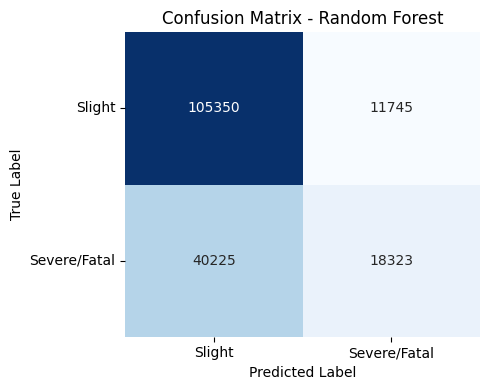

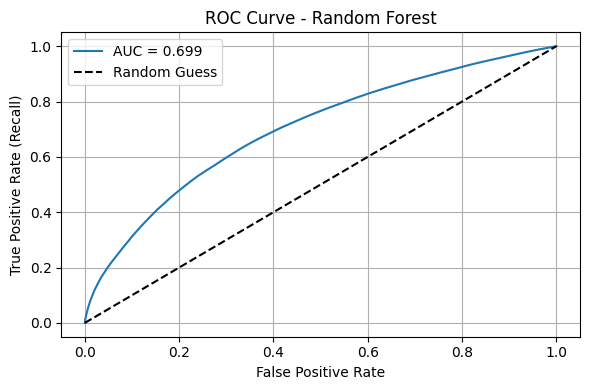

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix Heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks([0.5, 1.5], ['Slight', 'Severe/Fatal'])
plt.yticks([0.5, 1.5], ['Slight', 'Severe/Fatal'], rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba_rf):.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import joblib
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score, confusion_matrix

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Recalculate precision, recall, and thresholds for saving
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_proba_rf)

# Save evaluation results
rf_results = {
    'model_name': 'Random Forest',
    'confusion_matrix': cm_rf,
    'roc_auc': roc_auc_score(y_test, y_proba_rf),
    'classification_report': classification_report(y_test, y_pred_rf, output_dict=True),
    'precision': precision_rf,
    'recall': recall_rf,
    'thresholds': thresholds_rf
}

# Save the evaluation dictionary
joblib.dump(rf_results, 'random_forest_results.pkl')



['random_forest_results.pkl']

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:15:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.72      0.91      0.81    117095
           1       0.63      0.30      0.41     58548

    accuracy                           0.71    175643
   macro avg       0.67      0.61      0.61    175643
weighted avg       0.69      0.71      0.67    175643

Confusion Matrix:
 [[106495  10600]
 [ 40786  17762]]
ROC AUC Score: 0.7089392087060751


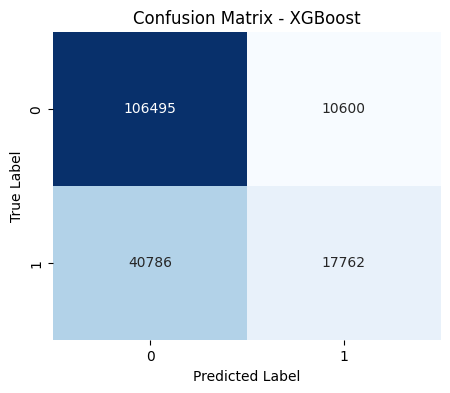

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a simple XGBoost classifier
xgb = XGBClassifier(
    eval_metric='logloss',     # evaluation metric
    random_state=42,           # for reproducibility
    use_label_encoder=False
)

# Train the model
xgb.fit(X_train, y_train)

# Predict on test set
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

# Evaluation metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:22:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}

--- Evaluation at Threshold = 0.4 ---
              precision    recall  f1-score   support

           0       0.82      0.50      0.62    117095
           1       0.44      0.78      0.56     58548

    accuracy                           0.59    175643
   macro avg       0.63      0.64      0.59    175643
weighted avg       0.69      0.59      0.60    175643

Confusion Matrix:
 [[58273 58822]
 [12844 45704]]
ROC AUC Score: 0.7106409774294448


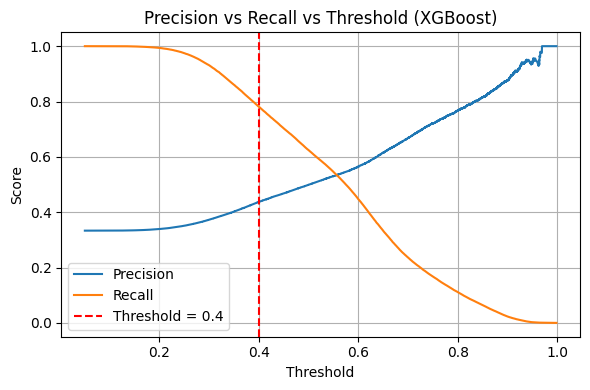

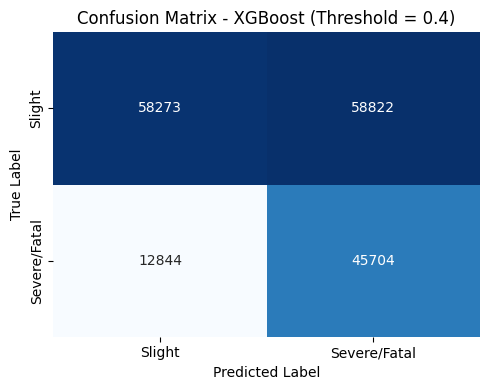

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Training data
X_to_use, y_to_use = X_train, y_train

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 1],
    'scale_pos_weight': [1, 2]
}

# Base model
xgb = XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1, use_label_encoder=False)

# RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Train model
xgb_search.fit(X_to_use, y_to_use)
best_xgb = xgb_search.best_estimator_

# Predict probabilities
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Set your custom threshold
custom_threshold = 0.4
# Predict using custom threshold
y_pred_custom = (y_proba > custom_threshold).astype(int)

# Evaluate
print("Best Parameters:", xgb_search.best_params_)
print(f"\n--- Evaluation at Threshold = {custom_threshold} ---")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.axvline(custom_threshold, color='red', linestyle='--', label=f'Threshold = {custom_threshold}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold (XGBoost)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_xticklabels(['Slight', 'Severe/Fatal'])
ax.set_yticklabels(['Slight', 'Severe/Fatal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - XGBoost (Threshold = {custom_threshold})')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_xgb, 'xgboost_model.pkl')
print("Model saved as 'xgboost_model.pkl'")


xgb_results = {
    'best_params': xgb_search.best_params_,
    'confusion_matrix': cm,
    'roc_auc': roc_auc_score(y_test, y_proba),
    'classification_report': classification_report(y_test, y_pred_custom, output_dict=True),
    'precision': precision,
    'recall': recall,
    'thresholds': thresholds
}

# Save the evaluation results
joblib.dump(xgb_results, 'xgboost_results.pkl')
print("📊 Evaluation results saved as 'xgboost_results.pkl'")


Model saved as 'xgboost_model.pkl'
📊 Evaluation results saved as 'xgboost_results.pkl'


In [ ]:
# Save preprocessing objects (make sure you already defined them earlier in your pipeline)
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(onehot_encode_cols, "onehot_cols.pkl")
joblib.dump(X_train.columns.tolist(), "X_columns.pkl")

print("🗂️ Preprocessing objects saved (encoders, one-hot cols, feature order).")


🗂️ Preprocessing objects saved (encoders, one-hot cols, feature order).


In [ ]:
# Load the model
loaded_model = joblib.load('xgboost_model.pkl')
import pandas as pd

# === Sample Input 2 ===
sample_input_2 = {
    'Number_of_Casualties': 3,
    'Number_of_Vehicles': 1,
    'Hour': 2,
    'Month': 1,
    'Year': 2023,
    'Season': 'Winter',
    'Time_of_Day': 'Late_Night',
    'Urban_Rural_Label': 'Rural',
    'Speed_Bin': 'High_70',
    'Weather_Label': 'Raining',
    'Light_Label': 'Dark_No_Lighting',
    'Road_Surface_Label': 'Wet_or_Damp',
    'Road_Type_Label': 'Single_Carriageway',
    'Day_of_Week_Label': 'Sunday',
    'Age_Band_of_Driver': '26-35',
    'Sex_of_Driver': 'Male',
    'Vehicle_Type': 'Car',
    'Was_Vehicle_Left_Hand_Drive': 'No',
    'Age_of_Vehicle': 5,
    'Driver_IMD_Decile': 4.0,
    'Engine_Capacity_.CC.': 1600.0,
    'Vehicle_Reference': 12345
}

# Convert to DataFrame
sample_df2 = pd.DataFrame([sample_input_2])

#  Label encode
for col in label_encode_cols:
    if col in sample_df2.columns:
        sample_df2[col] = label_encoders[col].transform(sample_df2[col])

# One-hot encode
sample_df2 = pd.get_dummies(sample_df2, columns=onehot_encode_cols)

# Align columns to match training features
for col in X.columns:
    if col not in sample_df2.columns:
        sample_df2[col] = 0
sample_df2 = sample_df2[X.columns]


model = best_xgb
pred_class = model.predict(sample_df2)[0]
proba = model.predict_proba(sample_df2)[0][1]
label = "Severe/Fatal" if pred_class == 1 else "Slight"

# Step 5: Output
print("\n=== Manual Prediction Result ===")
print(f"Predicted Class: {pred_class} → {label}")
print(f"Probability of Severe/Fatal: {round(proba, 3)}")



=== Manual Prediction Result ===
Predicted Class: 1 → Severe/Fatal
Probability of Severe/Fatal: 0.8500000238418579


In [ ]:

sample_input_3 = {
        # Minor rain, well-lit street
        'Number_of_Casualties': 1,
        'Number_of_Vehicles': 2,
        'Hour': 16,
        'Month': 4,
        'Year': 2021,
        'Age_of_Vehicle': 5,
        'Driver_IMD_Decile': 6.0,
        'Engine_Capacity_.CC.': 1600.0,
        'Vehicle_Reference': 1,
        'Season': 'Spring',
        'Time_of_Day': 'Daytime',
        'Urban_Rural_Label': 'Urban',
        'Speed_Bin': 'Mid_50',
        'Weather_Label': 'Raining',
        'Light_Label': 'Daylight',
        'Road_Surface_Label': 'Wet_or_Damp',
        'Road_Type_Label': 'Single_Carriageway',
        'Day_of_Week_Label': 'Tuesday',
        'Age_Band_of_Driver': '26-35',
        'Sex_of_Driver': 'Male',
        'Vehicle_Type': 'Car',
        'Was_Vehicle_Left_Hand_Drive': 'No'
    }
sample_df = pd.DataFrame([sample_input_3])

# Apply label encoding
for col in label_encode_cols:
    sample_df[col] = label_encoders[col].transform(sample_df[col])

# One-hot encode
sample_df = pd.get_dummies(sample_df, columns=onehot_encode_cols)

# Align with training features
for col in X.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0
sample_df = sample_df[X.columns]

# Predict
pred = best_xgb.predict(sample_df)[0]
proba = best_xgb.predict_proba(sample_df)[0][1]

label = "Severe/Fatal" if pred == 1 else "Slight"

print("Predicted Class:", pred, "→", label)
print("Probability of Severe/Fatal:", round(proba, 3))



Predicted Class: 0 → Slight
Probability of Severe/Fatal: 0.373


In [ ]:
sample_input_4 = {
        'Number_of_Casualties': 1,
        'Number_of_Vehicles': 1,
        'Hour': 5,
        'Month': 2,
        'Year': 2022,
        'Age_of_Vehicle': 8,
        'Driver_IMD_Decile': 7.0,
        'Engine_Capacity_.CC.': 1000.0,
        'Vehicle_Reference': 1,
        'Season': 'Winter',
        'Time_of_Day': 'Late_Night',
        'Urban_Rural_Label': 'Urban',
        'Speed_Bin': 'Low_30',
        'Weather_Label': 'Fine_No_Wind',
        'Light_Label': 'Dark_Street_Lights_Lit',
        'Road_Surface_Label': 'Dry',
        'Road_Type_Label': 'One_way_Street',
        'Day_of_Week_Label': 'Saturday',
        'Age_Band_of_Driver': '46-55',
        'Sex_of_Driver': 'Female',
        'Vehicle_Type': 'Car',
        'Was_Vehicle_Left_Hand_Drive': 'No'
    }
sample_df = pd.DataFrame([sample_input_4])

# Apply label encoding
for col in label_encode_cols:
    sample_df[col] = label_encoders[col].transform(sample_df[col])

# One-hot encode
sample_df = pd.get_dummies(sample_df, columns=onehot_encode_cols)

# Align with training features
for col in X.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0
sample_df = sample_df[X.columns]

# Predict
pred = best_xgb.predict(sample_df)[0]
proba = best_xgb.predict_proba(sample_df)[0][1]

label = "Severe/Fatal" if pred == 1 else "Slight"

print("Predicted Class:", pred, "→", label)
print("Probability of Severe/Fatal:", round(proba, 3))

Predicted Class: 1 → Severe/Fatal
Probability of Severe/Fatal: 0.641


                                              Feature  Importance
63                 Vehicle_Type_Motorcycle over 500cc    0.229370
52                                   Vehicle_Type_Car    0.096825
11                                  Urban_Rural_Label    0.062625
1                                  Number_of_Vehicles    0.032214
29                 Road_Type_Label_Single_Carriageway    0.031171
0                                Number_of_Casualties    0.030717
47                         Age_Band_of_Driver_Over 75    0.028227
12                                          Speed_Bin    0.027815
65                           Vehicle_Type_Pedal cycle    0.023637
46                         Age_Band_of_Driver_66 - 75    0.017301
51  Vehicle_Type_Bus or coach (17 or more pass seats)    0.017204
48                         Age_Band_of_Driver_Unknown    0.017030
62  Vehicle_Type_Motorcycle over 125cc and up to 5...    0.016805
28                         Road_Type_Label_Roundabout    0.016642
50        

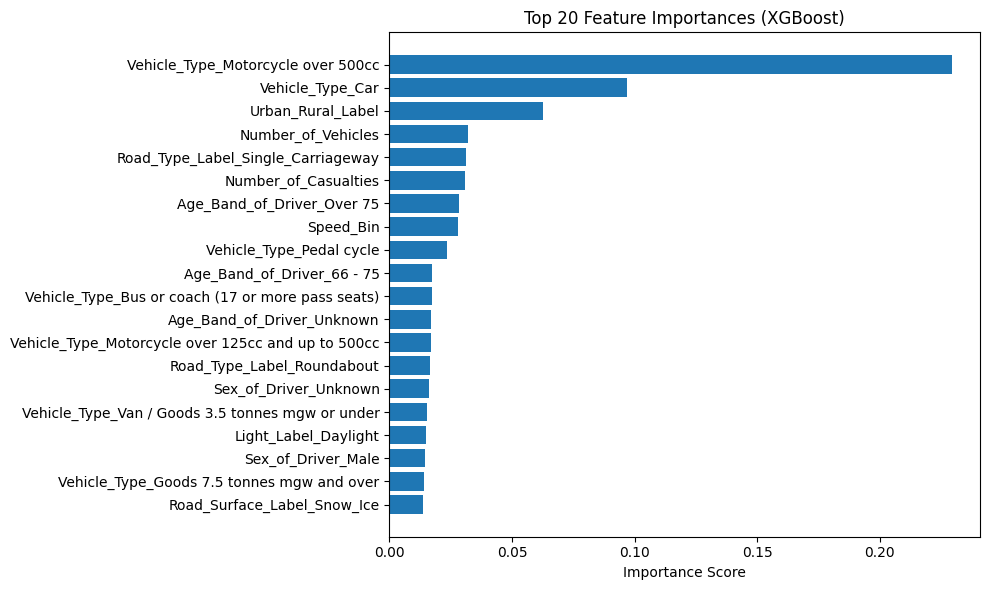

In [ ]:
# Get feature importances from the trained model
importances = best_xgb.feature_importances_

# Match with feature names
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Show top 15 features
print(feat_imp_df.head(15))
# Plot top 20 important features
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'].head(20)[::-1], feat_imp_df['Importance'].head(20)[::-1])
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


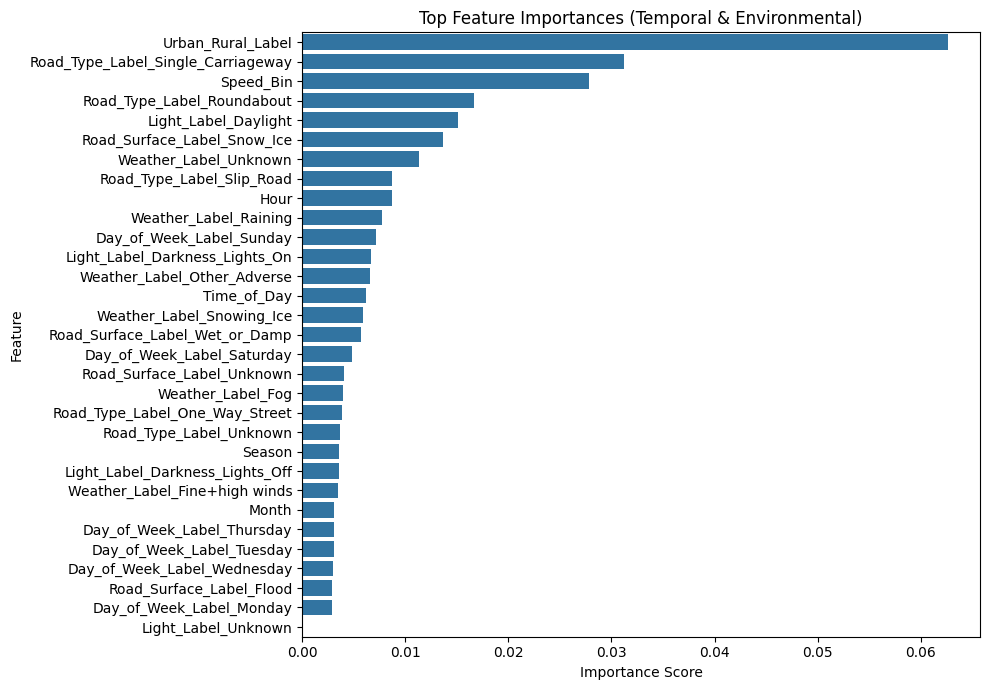

In [ ]:

# Get feature importances from the trained XGBoost model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb.feature_importances_
})

# Define relevant features
temporal_features = ['Hour', 'Month', 'Season', 'Time_of_Day', 'Day_of_Week_Label']
environmental_features = [
    'Urban_Rural_Label', 'Speed_Bin', 'Weather_Label',
    'Road_Surface_Label', 'Light_Label', 'Road_Type_Label'
]

# Match actual encoded feature names (like Weather_Label_Fine_No_Wind)
selected_features = [
    col for col in X.columns
    if any(feat in col for feat in temporal_features + environmental_features)
]

# Filter and sort
selected_df = feature_importances[feature_importances['Feature'].isin(selected_features)]
selected_df = selected_df.sort_values(by='Importance', ascending=False)  # DESCENDING

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(data=selected_df, x='Importance', y='Feature')
plt.title('Top Feature Importances (Temporal & Environmental)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
print("Label Encoded Columns:")
for col in label_encode_cols:
    print(f"  {col}: {list(label_encoders[col].classes_)}")

print("\n One-Hot Encoded Columns:")
for col in onehot_encode_cols:
    unique_vals = as_accident_level[col].dropna().astype(str).str.strip().unique().tolist()
    print(f"  {col}: {unique_vals}")


Label Encoded Columns:
  Season: ['Autumn', 'Spring', 'Summer', 'Winter']
  Time_of_Day: ['Daytime', 'Evening_Peak', 'Late_Night', 'Morning_Peak', 'Night']
  Urban_Rural_Label: ['Rural', 'Unknown', 'Urban']
  Speed_Bin: ['High_70', 'Low_30', 'Mid_50']

 One-Hot Encoded Columns:
  Weather_Label: ['Fine', 'Raining', 'Snowing_Ice', 'Fine+high winds', 'Other_Adverse', 'Unknown', 'Fog']
  Light_Label: ['Darkness_Lights_On', 'Daylight', 'Dark_No_Lighting', 'Darkness_Lights_Off', 'Unknown']
  Road_Surface_Label: ['Dry', 'Wet_or_Damp', 'Snow_Ice', 'Flood', 'Unknown']
  Road_Type_Label: ['Dual_Carriageway', 'Single_Carriageway', 'One_Way_Street', 'Roundabout', 'Slip_Road', 'Unknown']
  Day_of_Week_Label: ['Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Sunday', 'Saturday']
  Age_Band_of_Driver: ['36 - 45', '26 - 35', '46 - 55', '66 - 75', '16 - 20', '56 - 65', 'Unknown', '21 - 25', 'Over 75', '11 - 15', '6 - 10', '0 - 5']
  Sex_of_Driver: ['Male', 'Female', 'Unknown']
  Vehicle_Type: [

In [3]:
import gradio as gr
import pandas as pd
import joblib

# Load your saved files
best_xgb = joblib.load("xgboost_model.pkl")
label_encoders = joblib.load("label_encoders.pkl")
onehot_encode_cols = joblib.load("onehot_cols.pkl")
X_columns = joblib.load("X_columns.pkl")

# Define the prediction function
def predict_accident(
    casualties, vehicles, hour, month, year, day,
    road_type, speed_bin, urban, weather, light,
    surface, season, time_of_day, age_band, sex,
    imd, vehicle_type, left_drive, vehicle_age, engine_cc
):
    input_data = {
        'Number_of_Casualties': casualties,
        'Number_of_Vehicles': vehicles,
        'Hour': hour,
        'Month': month,
        'Year': year,
        'Season': season,
        'Time_of_Day': time_of_day,
        'Urban_Rural_Label': urban,
        'Speed_Bin': speed_bin,
        'Weather_Label': weather,
        'Light_Label': light,
        'Road_Surface_Label': surface,
        'Road_Type_Label': road_type,
        'Day_of_Week_Label': day,
        'Age_Band_of_Driver': age_band,
        'Sex_of_Driver': sex,
        'Vehicle_Type': vehicle_type,
        'Was_Vehicle_Left_Hand_Drive': left_drive,
        'Age_of_Vehicle': vehicle_age,
        'Driver_IMD_Decile': imd,
        'Engine_Capacity_.CC.': engine_cc,
        'Vehicle_Reference': 12345
    }
    df = pd.DataFrame([input_data])

    # Apply encoding
    for col in label_encoders:
        if col in df.columns:
            df[col] = label_encoders[col].transform(df[col])
    df = pd.get_dummies(df, columns=onehot_encode_cols)
    for col in X_columns:
        if col not in df.columns:
            df[col] = 0
    df = df[X_columns]

    proba = best_xgb.predict_proba(df)[0][1]
    threshold = 0.6
    label = "Severe/Fatal" if proba >= threshold else "Slight"
    emoji = "🔴" if label == "Severe/Fatal" else "🟢"

    return f"{emoji} {label} | Probability of Severe/Fatal: {round(proba*100,2)}%"


In [4]:
day_opts = ['Wednesday','Thursday','Friday','Monday','Tuesday','Sunday','Saturday']
road_type_opts = ['Dual_Carriageway','Single_Carriageway','One_Way_Street','Roundabout','Slip_Road','Unknown']
speed_opts = ['High_70','Low_30','Mid_50']
urban_opts = ['Rural','Unknown','Urban']
weather_opts = ['Fine','Raining','Snowing_Ice','Fine+high winds','Other_Adverse','Unknown','Fog']
light_opts = ['Darkness_Lights_On','Daylight','Dark_No_Lighting','Darkness_Lights_Off','Unknown']
surface_opts = ['Dry','Wet_or_Damp','Snow_Ice','Flood','Unknown']
season_opts = ['Autumn','Spring','Summer','Winter']
time_opts = ['Daytime','Evening_Peak','Late_Night','Morning_Peak','Night']
age_band_opts = ['36 - 45','26 - 35','46 - 55','66 - 75','16 - 20','56 - 65','Unknown',
                 '21 - 25','Over 75','11 - 15','6 - 10','0 - 5']
sex_opts = ['Male','Female','Unknown']
vehicle_type_opts = ['Car','Bus or coach (17+ pass seats)','Motorcycle 125cc and under','Motorcycle over 500cc',
                     'Motorcycle over 125cc and up to 500cc','Taxi/Private hire car','Goods 7.5 tonnes mgw and over',
                     'Van / Goods 3.5 tonnes mgw or under','Motorcycle 50cc and under','Goods over 3.5t. and under 7.5t',
                     'Minibus (8 - 16 passenger seats)','Other vehicle','Agricultural vehicle','Pedal cycle',
                     'Tram','Ridden horse','Unknown','Motorcycle - unknown cc','Mobility scooter',
                     'Goods vehicle - unknown weight','Electric motorcycle']
left_drive_opts = ['No','Yes','Unknown']

iface = gr.Interface(
    fn=predict_accident,
    inputs=[
        gr.Slider(1,10,label="Casualties"),
        gr.Slider(1,10,label="Vehicles"),
        gr.Slider(0,23,label="Hour"),
        gr.Slider(1,12,label="Month"),
        gr.Slider(2005,2025,label="Year"),
        gr.Dropdown(day_opts,label="Day"),
        gr.Dropdown(road_type_opts,label="Road Type"),
        gr.Dropdown(speed_opts,label="Speed Bin"),
        gr.Dropdown(urban_opts,label="Urban/Rural"),
        gr.Dropdown(weather_opts,label="Weather"),
        gr.Dropdown(light_opts,label="Lighting"),
        gr.Dropdown(surface_opts,label="Surface"),
        gr.Dropdown(season_opts,label="Season"),
        gr.Dropdown(time_opts,label="Time of Day"),
        gr.Dropdown(age_band_opts,label="Driver Age"),
        gr.Dropdown(sex_opts,label="Sex"),
        gr.Slider(1,10,label="IMD Decile"),
        gr.Dropdown(vehicle_type_opts,label="Vehicle Type"),
        gr.Dropdown(left_drive_opts,label="Left-Hand Drive"),
        gr.Slider(0,30,label="Vehicle Age"),
        gr.Slider(500,5000,step=100,label="Engine CC")
    ],
    outputs="text",
    live=False,
    title="🚧 Accident Severity Prediction"
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f06f6d4ca09f983496.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
'''
import joblib
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML


best_xgb = joblib.load("xgboost_model.pkl")

label_encoders = joblib.load("label_encoders.pkl")
onehot_encode_cols = joblib.load("onehot_cols.pkl")
X_columns = joblib.load("X_columns.pkl")
print(" Model, encoders, and column metadata loaded.")

# === STYLING ===
display(HTML("""
<style>
.widget-label { min-width: 160px !important; font-weight: bold; }
.output-box {
    background: #f8f9fa;
    padding: 15px;
    margin-top: 15px;
    border-left: 5px solid #4caf50;
    border-radius: 10px;
    font-family: 'Segoe UI', sans-serif;
}
</style>
"""))

# === OPTIONS ===
season_opts = ['Autumn', 'Spring', 'Summer', 'Winter']
time_opts = ['Daytime', 'Evening_Peak', 'Late_Night', 'Morning_Peak', 'Night']
urban_opts = ['Rural', 'Unknown', 'Urban']
speed_opts = ['High_70', 'Low_30', 'Mid_50']
weather_opts = ['Fine', 'Raining', 'Snowing_Ice', 'Fine+high winds', 'Other_Adverse', 'Unknown', 'Fog']
light_opts = ['Darkness_Lights_On', 'Daylight', 'Dark_No_Lighting', 'Darkness_Lights_Off', 'Unknown']
surface_opts = ['Dry', 'Wet_or_Damp', 'Snow_Ice', 'Flood', 'Unknown']
road_type_opts = ['Dual_Carriageway', 'Single_Carriageway', 'One_Way_Street', 'Roundabout', 'Slip_Road', 'Unknown']
day_opts = ['Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Sunday', 'Saturday']
age_band_opts = ['36 - 45', '26 - 35', '46 - 55', '66 - 75', '16 - 20', '56 - 65', 'Unknown',
                 '21 - 25', 'Over 75', '11 - 15', '6 - 10', '0 - 5']
sex_opts = ['Male', 'Female', 'Unknown']
vehicle_type_opts = ['Bus or coach (17 or more pass seats)', 'Car', 'Motorcycle 125cc and under',
                     'Motorcycle over 500cc','Motorcycle over 125cc and up to 500cc', 'Taxi/Private hire car',
                     'Goods 7.5 tonnes mgw and over','Van / Goods 3.5 tonnes mgw or under', 'Motorcycle 50cc and under',
                     'Goods over 3.5t. and under 7.5t','Minibus (8 - 16 passenger seats)', 'Other vehicle',
                     'Agricultural vehicle', 'Pedal cycle', 'Tram','Ridden horse', 'Unknown',
                     'Motorcycle - unknown cc', 'Mobility scooter','Goods vehicle - unknown weight', 'Electric motorcycle']
left_drive_opts = ['No', 'Yes', 'Unknown']

# === WIDGETS ===
casualties = widgets.IntSlider(description='Casualties', min=1, max=10, value=1)
vehicles = widgets.IntSlider(description='Vehicles', min=1, max=10, value=1)
hour = widgets.IntSlider(description='Hour', min=0, max=23, value=12)
month = widgets.Dropdown(description='Month', options=list(range(1, 13)), value=6)
year = widgets.Dropdown(description='Year', options=list(range(2005, 2026)), value=2023)
day = widgets.Dropdown(description='Day of Week', options=day_opts)
road_type = widgets.Dropdown(description='Road Type', options=road_type_opts)
speed_bin = widgets.Dropdown(description='Speed Bin', options=speed_opts)
urban = widgets.Dropdown(description='Urban/Rural', options=urban_opts)
weather = widgets.Dropdown(description='Weather', options=weather_opts)
light = widgets.Dropdown(description='Lighting', options=light_opts)
surface = widgets.Dropdown(description='Surface', options=surface_opts)
season = widgets.Dropdown(description='Season', options=season_opts)
time_of_day = widgets.Dropdown(description='Time of Day', options=time_opts)
age_band = widgets.Dropdown(description='Driver Age', options=age_band_opts)
sex = widgets.Dropdown(description='Sex of Driver', options=sex_opts)
imd = widgets.FloatSlider(description='IMD Decile', min=1, max=10, step=1, value=5.0)
vehicle_type = widgets.Dropdown(description='Vehicle Type', options=vehicle_type_opts)
left_drive = widgets.Dropdown(description='Left-Hand Drive', options=left_drive_opts)
vehicle_age = widgets.IntSlider(description='Vehicle Age', min=0, max=30, value=5)
engine_cc = widgets.IntSlider(description='Engine CC', min=500, max=5000, step=100, value=1600)

predict_btn = widgets.Button(description="🚦 Predict", button_style='success')
output_box = widgets.Output()

# === LAYOUT ===
form_widgets = widgets.VBox([
    casualties, vehicles, hour, month, year, day,
    road_type, speed_bin, urban, weather, light, surface,
    season, time_of_day, age_band, sex, imd,
    vehicle_type, left_drive, vehicle_age, engine_cc,
    predict_btn, output_box
])

# === CALLBACK ===
def on_predict_clicked(b):
    input_data = {
        'Number_of_Casualties': casualties.value,
        'Number_of_Vehicles': vehicles.value,
        'Hour': hour.value,
        'Month': month.value,
        'Year': year.value,
        'Season': season.value,
        'Time_of_Day': time_of_day.value,
        'Urban_Rural_Label': urban.value,
        'Speed_Bin': speed_bin.value,
        'Weather_Label': weather.value,
        'Light_Label': light.value,
        'Road_Surface_Label': surface.value,
        'Road_Type_Label': road_type.value,
        'Day_of_Week_Label': day.value,
        'Age_Band_of_Driver': age_band.value,
        'Sex_of_Driver': sex.value,
        'Vehicle_Type': vehicle_type.value,
        'Was_Vehicle_Left_Hand_Drive': left_drive.value,
        'Age_of_Vehicle': vehicle_age.value,
        'Driver_IMD_Decile': imd.value,
        'Engine_Capacity_.CC.': engine_cc.value,
        'Vehicle_Reference': 12345
    }

    df = pd.DataFrame([input_data])

    # === Apply Encoding (same as training) ===
    for col in label_encoders:
        if col in df.columns:
            df[col] = label_encoders[col].transform(df[col])

    df = pd.get_dummies(df, columns=onehot_encode_cols)

    # Add any missing columns (ensure same order as training data)
    for col in X_columns:
        if col not in df.columns:
            df[col] = 0
    df = df[X_columns]

    # === Prediction ===
    proba = best_xgb.predict_proba(df)[0][1]
    threshold = 0.6
    label = "Severe/Fatal" if proba >= threshold else "Slight"
    emoji = "🔴" if label == "Severe/Fatal" else "🟢"

    with output_box:
        clear_output()
        display(HTML(f"""
        <div class='output-box'>
            <h4>📊 Prediction Summary</h4>
            <p><b>Label:</b> {emoji} {label}</p>
            <p><b>Probability of Severe/Fatal:</b> {round(proba * 100, 2)}%</p>
        </div>
        """))

predict_btn.on_click(on_predict_clicked)

# === DISPLAY ===
display(HTML("<h2 style='color:#2c3e50; text-align:center;'>🚧 Accident Severity Prediction</h2>"))
display(form_widgets)
'''

 Model, encoders, and column metadata loaded.


                 Model  Precision    Recall  F1 Score   ROC AUC
3              XGBoost   0.437250  0.780624  0.560531  0.710641
1                  MLP   0.630362  0.283613  0.391212  0.705146
2        Random Forest   0.609385  0.312957  0.413537  0.699495
0  Logistic Regression   0.619623  0.231041  0.336580  0.665189


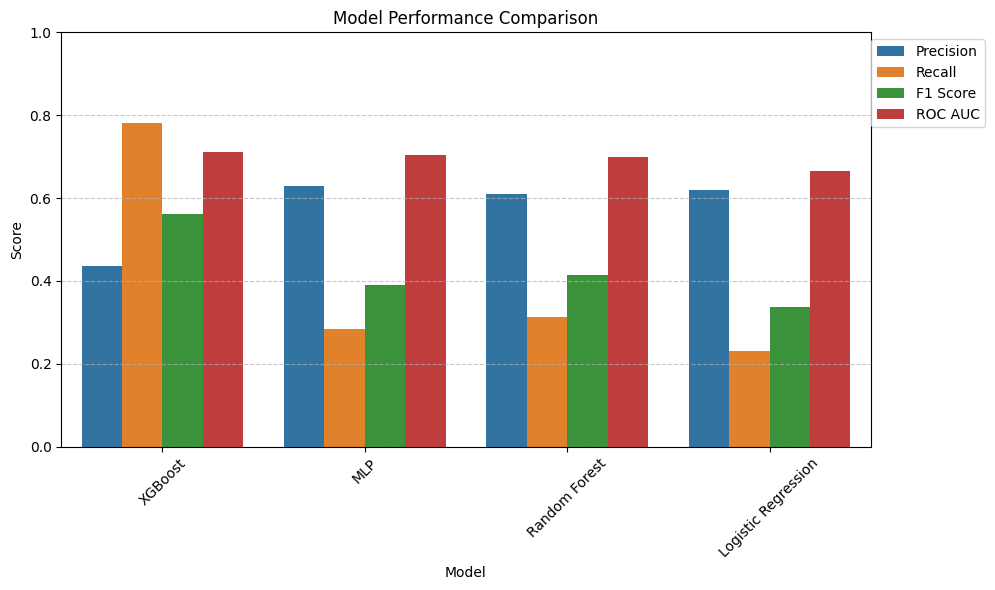

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect predictions and probabilities from each model
models_info = {
    'Logistic Regression': {'y_pred': y_pred_log, 'y_proba': y_proba_log},
    'MLP': {'y_pred': mlp_pred, 'y_proba': mlp_proba},
    'Random Forest': {'y_pred': y_pred_rf, 'y_proba': y_proba_rf},
    'XGBoost': {'y_pred': y_pred_custom, 'y_proba': y_proba},
}

# Evaluate and store results
results = []
for name, data in models_info.items():
    prec = precision_score(y_test, data['y_pred'])
    rec = recall_score(y_test, data['y_pred'])
    f1 = f1_score(y_test, data['y_pred'])
    auc = roc_auc_score(y_test, data['y_proba'])

    results.append({
        'Model': name,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    })

# Convert to DataFrame and sort by ROC AUC
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
print(results_df)

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df.melt(id_vars='Model'),
    x='Model', y='value', hue='variable'
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("model_performance_comparison.png")
plt.show()